## Task 2 - Model Building and Training

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import mlflow
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Add the parent directory to the system path 
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

In [3]:
from scripts.model_utils import *

In [4]:
# Load fraud data
fraud_data = pd.read_csv('../data/processed/processed_fraud_data.csv')
# Load credit card data
credit_data = pd.read_csv('../data/processed/processed_credit_card.csv')

In [5]:
fraud_data.head()

,user_id,purchase_value,device_id,age,ip_address,class,ip_int,hour_of_day,day_of_week,month,...,country_Zambia,country_Zimbabwe,signup_hour,signup_day,signup_year,signup_month,purchase_hour,purchase_day,purchase_year,purchase_month
0,247547,0.549607,KIXYSVCHIPQBR,-0.363124,-1.728724,0,-1.728724,-1.231124,1.487911,0.749993,...,False,False,22,1,2015,2,2,5,2015,4
1,220737,-1.197335,PKYOWQKWGJNJI,0.101168,-1.728666,0,-1.728666,1.229002,-0.505034,-1.500438,...,False,False,20,6,2015,6,1,0,2015,6
2,390400,0.385831,LVCSXLISZHVUO,-0.479197,-1.728664,0,-1.728664,1.663142,0.989675,-0.750295,...,False,False,18,3,2015,1,18,3,2015,1
3,69592,0.986342,UHAUHNXXUADJE,-0.363124,-1.728577,0,-1.728577,0.650149,0.989675,-0.375223,...,False,False,21,1,2015,4,13,0,2015,5
4,174987,0.767974,XPGPMOHIDRMGE,0.449387,-1.728546,0,-1.728546,-1.086411,-1.003270,1.875208,...,False,False,7,1,2015,7,18,2,2015,9


In [6]:
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996823,-0.701082,-0.041687,1.680101,0.976623,-0.247020,0.348012,0.193700,0.084434,0.333534,...,-0.024777,0.383483,-0.177444,0.110157,0.247059,-0.392622,0.333033,-0.065850,0.244200,0
1,-1.996823,0.608792,0.164138,0.109279,0.318998,0.042258,-0.060980,-0.065656,0.072903,-0.231703,...,-0.311372,-0.881454,0.162081,-0.561503,0.321175,0.260854,-0.027154,0.043219,-0.342584,0
2,-1.996802,-0.700336,-0.811337,1.174270,0.270648,-0.366756,1.352655,0.643223,0.210788,-1.381169,...,0.343094,1.065068,1.457772,-1.138484,-0.628161,-0.288861,-0.144325,-0.183824,1.158900,0
3,-1.996802,-0.499064,-0.109972,1.187383,-0.608355,-0.008814,0.937245,0.192079,0.320843,-1.264664,...,-0.149093,0.007299,-0.305465,-1.941446,1.242487,-0.460694,0.154039,0.185687,0.139886,0
4,-1.996781,-0.597606,0.535539,1.025470,0.287092,-0.297036,0.072873,0.481517,-0.228725,0.747917,...,-0.012516,1.101780,-0.220709,0.232904,-0.394800,1.041677,0.550001,0.654234,-0.073813,0


In [7]:
print(fraud_data.isnull().sum())

user_id           0
purchase_value    0
device_id         0
age               0
ip_address        0
                 ..
signup_month      0
purchase_hour     0
purchase_day      0
purchase_year     0
purchase_month    0
Length: 212, dtype: int64


In [8]:
fraud_data.dtypes

user_id             int64
purchase_value    float64
device_id          object
age               float64
ip_address        float64
                   ...   
signup_month        int64
purchase_hour       int64
purchase_day        int64
purchase_year       int64
purchase_month      int64
Length: 212, dtype: object

In [9]:
fraud_data.columns

Index(['user_id', 'purchase_value', 'device_id', 'age', 'ip_address', 'class',
       'ip_int', 'hour_of_day', 'day_of_week', 'month',
       ...
       'country_Zambia', 'country_Zimbabwe', 'signup_hour', 'signup_day',
       'signup_year', 'signup_month', 'purchase_hour', 'purchase_day',
       'purchase_year', 'purchase_month'],
      dtype='object', length=212)

In [33]:
credit_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
#Initialize MLflow experiment
mlflow.set_experiment("fraud_detection_comparison")

<Experiment: artifact_location='file:///d:/KIFYA%20AIM/WEEK%208%20AND%209/project/fraud-detection-system/notebooks/mlruns/743817608207788903', creation_time=1729453842785, experiment_id='743817608207788903', last_update_time=1729453842785, lifecycle_stage='active', name='fraud_detection_comparison', tags={}>

In [11]:
# Initialize the modeling class for both datasets
fraud_detector_ecommerce = FraudDetectionModeling(experiment_name="ecommerce_fraud_detection")
fraud_detector_credit = FraudDetectionModeling(experiment_name="credit_fraud_detection")

In [13]:
# Encode Categorical Features
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['device_id','age_group']
le = LabelEncoder()
for col in categorical_columns:
    fraud_data[col] = le.fit_transform(fraud_data[col])

### Prepare features and target for both datasets

In [14]:
# For Fraud Data
X_fraud = fraud_data.drop(['class'], axis=1)
y_fraud = fraud_data['class']

In [15]:
print(X_fraud.dtypes)

user_id             int64
purchase_value    float64
device_id           int32
age               float64
ip_address        float64
                   ...   
signup_month        int64
purchase_hour       int64
purchase_day        int64
purchase_year       int64
purchase_month      int64
Length: 211, dtype: object


In [16]:
X_train_fraud_scaled, X_test_fraud_scaled, y_train_fraud, y_test_fraud = \
    fraud_detector_ecommerce.prepare_data(X_fraud, y_fraud, test_size=0.2, sampling_strategy='balanced')

In [17]:
print("\nPreparing Credit Card Fraud Data...")
X_credit = credit_data.drop(['Class'], axis=1)
y_credit = credit_data['Class']


Preparing Credit Card Fraud Data...


In [18]:
X_train_credit_scaled, X_test_credit_scaled, y_train_credit, y_test_credit = \
    fraud_detector_credit.prepare_data(X_credit, y_credit, test_size=0.2, sampling_strategy='balanced')

### Initialize models for both datasets

In [19]:
# Initialize models for both datasets
print("\nInitializing models...")
# E-commerce fraud models
fraud_detector_ecommerce.initialize_traditional_models()
fraud_detector_ecommerce.initialize_deep_models(input_shape=(X_train_fraud_scaled.shape[1], 1))


Initializing models...


In [20]:
# Credit card fraud models
fraud_detector_credit.initialize_traditional_models()
fraud_detector_credit.initialize_deep_models(input_shape=(X_train_credit_scaled.shape[1], 1))

In [21]:
# Train and evaluate ML models
print("\nTraining traditional models...")

# Machine learning models for E-commerce fraud
traditional_models = ['logistic_regression', 'decision_tree', 'random_forest', 
                     'gradient_boosting', 'mlp']

print("\nTraining E-commerce Fraud Detection Models:")
for model_name in traditional_models:
    print(f"\nTraining {model_name}...")
    fraud_detector_ecommerce.train_traditional_model(model_name)


Training traditional models...

Training E-commerce Fraud Detection Models:

Training logistic_regression...


2024/10/22 15:29:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Training decision_tree...


2024/10/22 15:29:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Training random_forest...


2024/10/22 15:30:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Training gradient_boosting...


2024/10/22 15:36:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Training mlp...


2024/10/22 15:41:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [22]:
print("\nTraining Credit Card Fraud Detection Models:")
for model_name in traditional_models:
    print(f"\nTraining {model_name}...")
    fraud_detector_credit.train_traditional_model(model_name)


Training Credit Card Fraud Detection Models:

Training logistic_regression...


2024/10/22 15:41:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Training decision_tree...


2024/10/22 15:43:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Training random_forest...


2024/10/22 15:58:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Training gradient_boosting...


2024/10/22 16:15:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Training mlp...


2024/10/22 16:16:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


## Train and evaluate deep learning models

In [24]:
# Train and evaluate deep learning models
print("\nTraining deep learning models...")

# Deep learning models for E-commerce fraud
deep_models = ['cnn', 'rnn', 'lstm']

print("\nTraining E-commerce Fraud Deep Learning Models:")
for model_name in deep_models:
    print(f"\nTraining {model_name}...")
    fraud_detector_ecommerce.train_deep_model(model_name, epochs=10, batch_size=32)

print("\nTraining Credit Card Fraud Deep Learning Models:")
for model_name in deep_models:
    print(f"\nTraining {model_name}...")
    fraud_detector_credit.train_deep_model(model_name, epochs=10, batch_size=32)


Training deep learning models...

Training E-commerce Fraud Deep Learning Models:

Training cnn...
Epoch 1/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.9253 - loss: 0.1911 - val_accuracy: 0.9437 - val_loss: 0.2367
Epoch 2/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 0.9275 - loss: 0.1840 - val_accuracy: 0.9354 - val_loss: 0.2532
Epoch 3/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.9293 - loss: 0.1802 - val_accuracy: 0.9001 - val_loss: 0.3071
Epoch 4/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.9289 - loss: 0.1803 - val_accuracy: 0.9095 - val_loss: 0.2971
Epoch 5/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.9312 - loss: 0.1745 - val_accuracy: 0.9371 - val_loss: 0.2568
Epoch 6/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 0.9327 - loss: 0.1712 - val_accuracy: 0.9070 - val_loss: 0.2965
Epoch 7/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9335 - loss: 0.1699 - val_accuracy: 0.9425 - 

2024/10/22 16:27:17 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/22 16:27:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Training rnn...
Epoch 1/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 234s 40ms/step - accuracy: 0.5002 - loss: 0.6968 - val_accuracy: 0.5019 - val_loss: 0.6950
Epoch 2/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 198s 34ms/step - accuracy: 0.5189 - loss: 0.6922 - val_accuracy: 0.6664 - val_loss: 0.6621
Epoch 3/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 217s 37ms/step - accuracy: 0.5578 - loss: 0.6828 - val_accuracy: 0.7141 - val_loss: 0.5876
Epoch 4/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 197s 34ms/step - accuracy: 0.5908 - loss: 0.6716 - val_accuracy: 0.3432 - val_loss: 0.8100
Epoch 5/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 217s 37ms/step - accuracy: 0.5983 - loss: 0.6664 - val_accuracy: 0.5610 - val_loss: 0.6932
Epoch 6/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 202s 35ms/step - accuracy: 0.6220 - loss: 0.6561 - val_accuracy: 0.4720 - val_loss: 0.7429
Epoch 7/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 218s 37ms/step - accuracy: 0.6307 - loss: 0.6499 - val_accuracy: 0.5642 - val_loss: 0.6706
Epoch 8/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 201s 34ms/

2024/10/22 17:02:40 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/22 17:02:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Training lstm...
Epoch 1/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 2794s 478ms/step - accuracy: 0.5904 - loss: 0.6663 - val_accuracy: 0.5592 - val_loss: 0.6838
Epoch 2/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 434s 74ms/step - accuracy: 0.6215 - loss: 0.6520 - val_accuracy: 0.6497 - val_loss: 0.6401
Epoch 3/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 464s 79ms/step - accuracy: 0.6470 - loss: 0.6377 - val_accuracy: 0.6442 - val_loss: 0.6421
Epoch 4/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 465s 80ms/step - accuracy: 0.6706 - loss: 0.6107 - val_accuracy: 0.7492 - val_loss: 0.5287
Epoch 5/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 469s 80ms/step - accuracy: 0.7073 - loss: 0.5475 - val_accuracy: 0.7954 - val_loss: 0.4974
Epoch 6/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 468s 80ms/step - accuracy: 0.7597 - loss: 0.4786 - val_accuracy: 0.8163 - val_loss: 0.4710
Epoch 7/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 470s 80ms/step - accuracy: 0.7912 - loss: 0.4322 - val_accuracy: 0.8519 - val_loss: 0.4393
Epoch 8/10
5844/5844 ━━━━━━━━━━━━━━━━━━━━ 469s 80

2024/10/22 18:59:24 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/22 18:59:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Training Credit Card Fraud Deep Learning Models:

Training cnn...
Epoch 1/10
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - accuracy: 0.9810 - loss: 0.0489 - val_accuracy: 0.9969 - val_loss: 0.0169
Epoch 2/10
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.9984 - loss: 0.0063 - val_accuracy: 0.9982 - val_loss: 0.0193
Epoch 3/10
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.9990 - loss: 0.0039 - val_accuracy: 0.9987 - val_loss: 0.0215
Epoch 4/10
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.9993 - loss: 0.0034 - val_accuracy: 0.9990 - val_loss: 0.0234
Epoch 5/10
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.9993 - loss: 0.0030 - val_accuracy: 0.9982 - val_loss: 0.0282
Epoch 6/10
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.9994 - loss: 0.0032 - val_accuracy: 0.9988 - val_loss: 0.0304
Epoch 7/10
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.9995 - loss: 0.0023 - val_accuracy: 0.9992 - val_loss: 0.0337
Ep

2024/10/22 19:04:44 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/22 19:04:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Training rnn...
Epoch 1/10
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 92s 6ms/step - accuracy: 0.9813 - loss: 0.0517 - val_accuracy: 0.9947 - val_loss: 0.0168
Epoch 2/10
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 92s 6ms/step - accuracy: 0.9946 - loss: 0.0177 - val_accuracy: 0.9930 - val_loss: 0.0219
Epoch 3/10
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 93s 7ms/step - accuracy: 0.9949 - loss: 0.0169 - val_accuracy: 0.9954 - val_loss: 0.0167
Epoch 4/10
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 95s 7ms/step - accuracy: 0.9943 - loss: 0.0187 - val_accuracy: 0.9937 - val_loss: 0.0198
Epoch 5/10
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 94s 7ms/step - accuracy: 0.9945 - loss: 0.0188 - val_accuracy: 0.9944 - val_loss: 0.0181
Epoch 6/10
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 94s 7ms/step - accuracy: 0.9934 - loss: 0.0217 - val_accuracy: 0.9905 - val_loss: 0.0284
Epoch 7/10
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 94s 7ms/step - accuracy: 0.9933 - loss: 0.0223 - val_accuracy: 0.9930 - val_loss: 0.0213
Epoch 8/10
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 94s 7ms/

2024/10/22 19:20:30 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/22 19:20:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Training lstm...
Epoch 1/10
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 183s 13ms/step - accuracy: 0.9544 - loss: 0.1208 - val_accuracy: 0.9961 - val_loss: 0.0140
Epoch 2/10
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 180s 13ms/step - accuracy: 0.9948 - loss: 0.0167 - val_accuracy: 0.9957 - val_loss: 0.0153
Epoch 3/10
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 185s 13ms/step - accuracy: 0.9974 - loss: 0.0092 - val_accuracy: 0.9980 - val_loss: 0.0087
Epoch 4/10
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 169s 12ms/step - accuracy: 0.9980 - loss: 0.0069 - val_accuracy: 0.9973 - val_loss: 0.0111
Epoch 5/10
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 168s 12ms/step - accuracy: 0.9988 - loss: 0.0047 - val_accuracy: 0.9982 - val_loss: 0.0080
Epoch 6/10
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 169s 12ms/step - accuracy: 0.9989 - loss: 0.0041 - val_accuracy: 0.9980 - val_loss: 0.0096
Epoch 7/10
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 170s 12ms/step - accuracy: 0.9991 - loss: 0.0035 - val_accuracy: 0.9990 - val_loss: 0.0068
Epoch 8/10
14163/14163 ━━━━━━━━━━━━━━

2024/10/22 19:49:43 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/22 19:49:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


### Plot results and compare models

#### results for fraud_data models


E-commerce Fraud Detection Results:


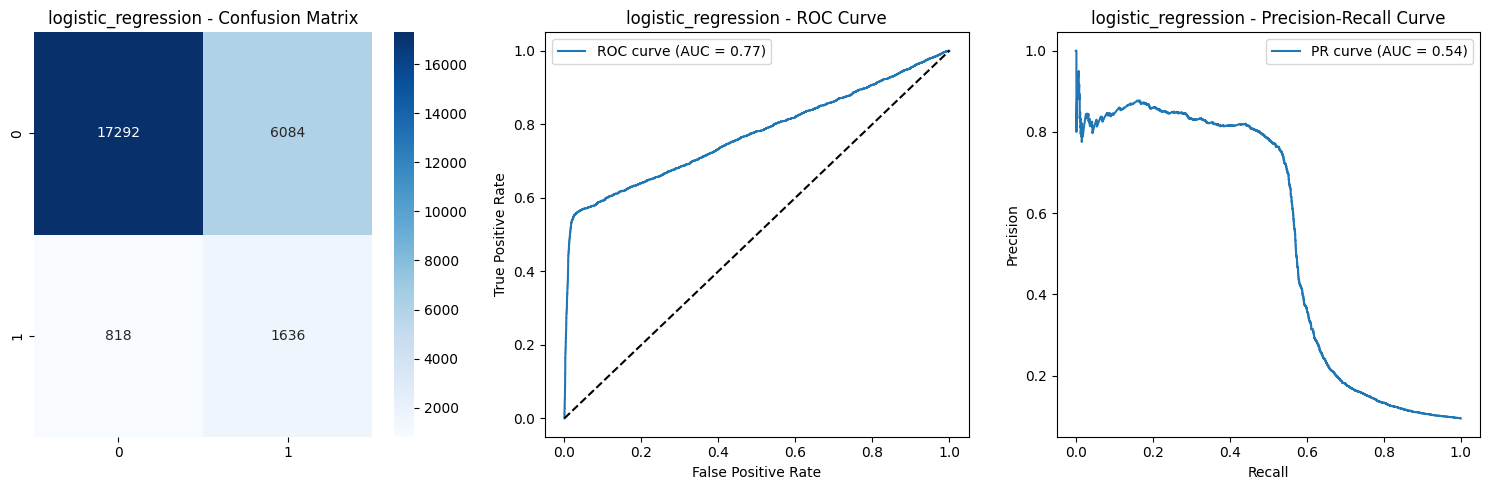

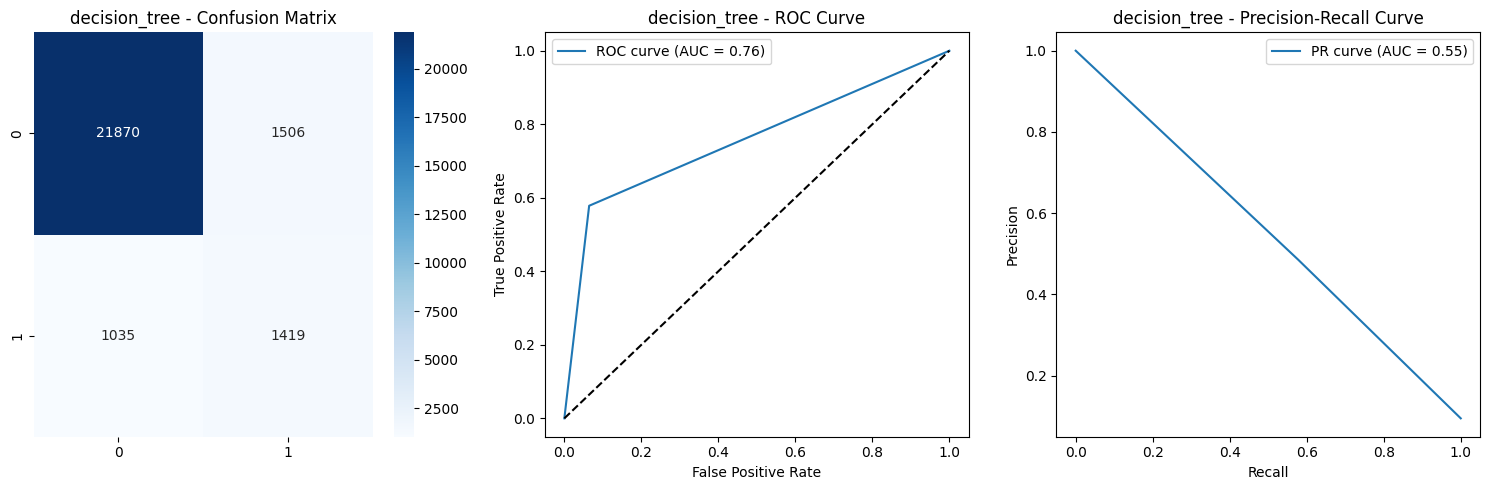

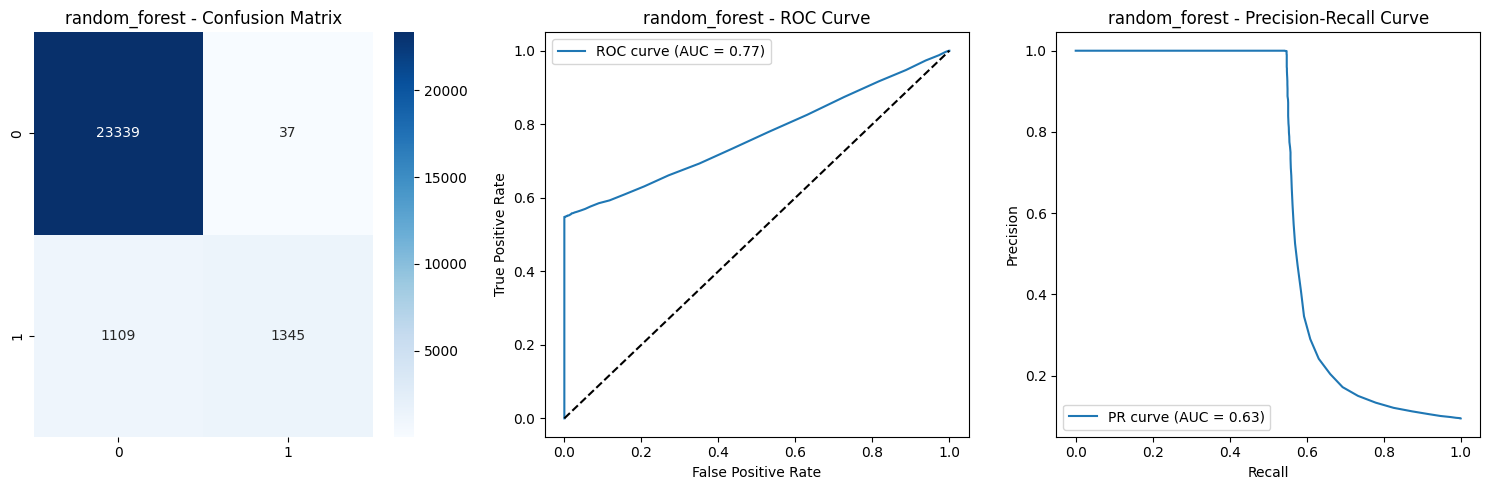

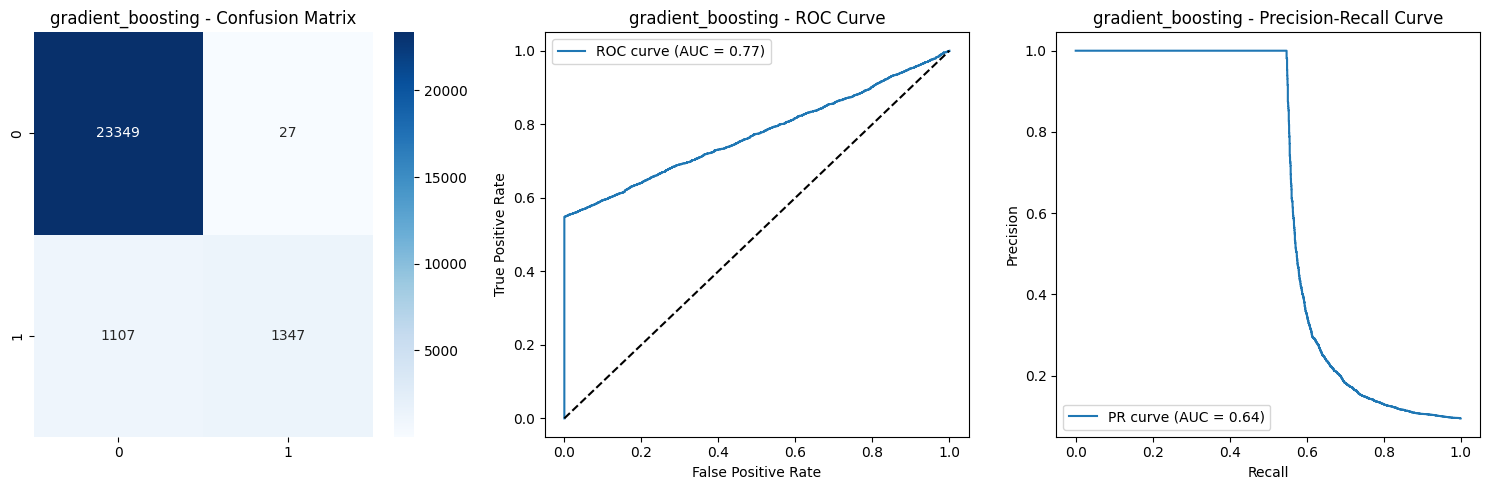

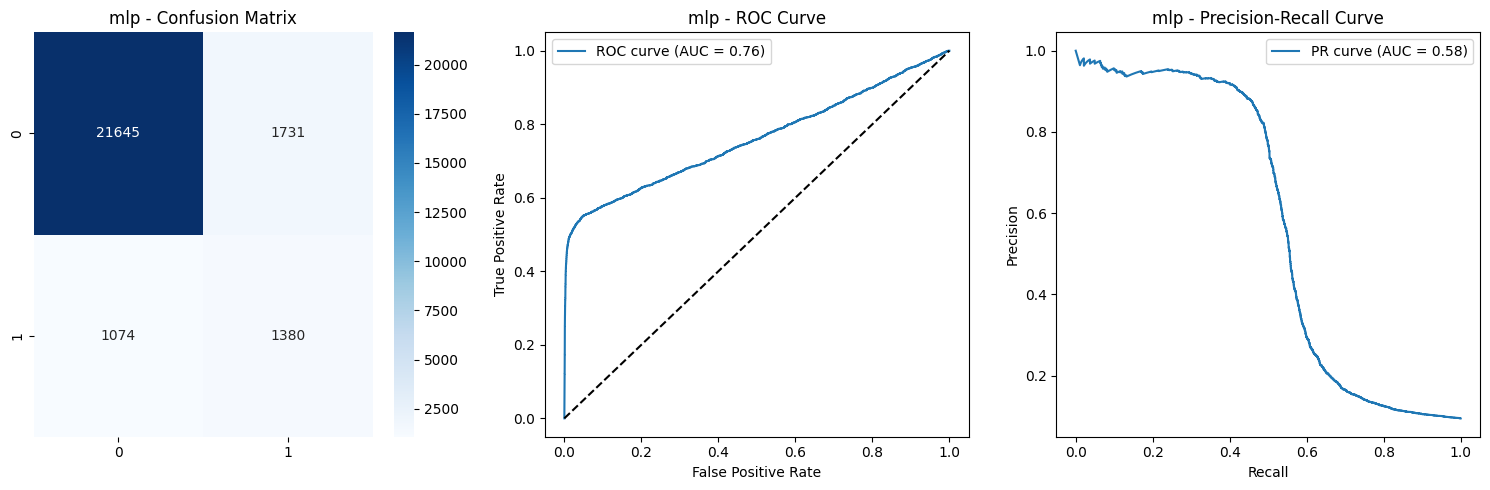

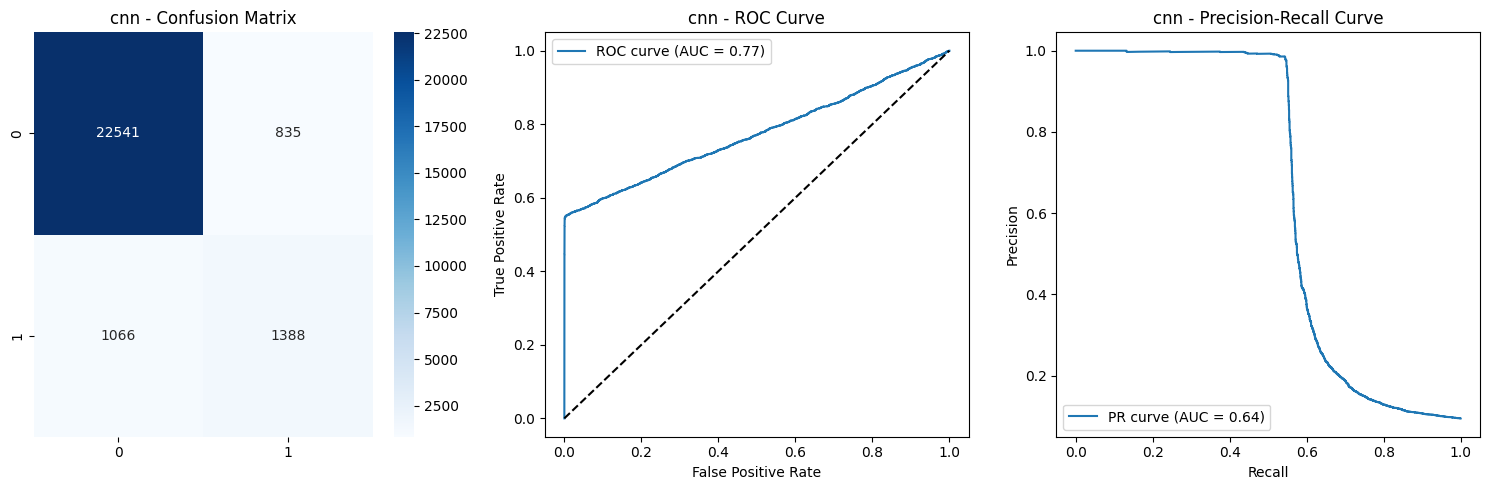

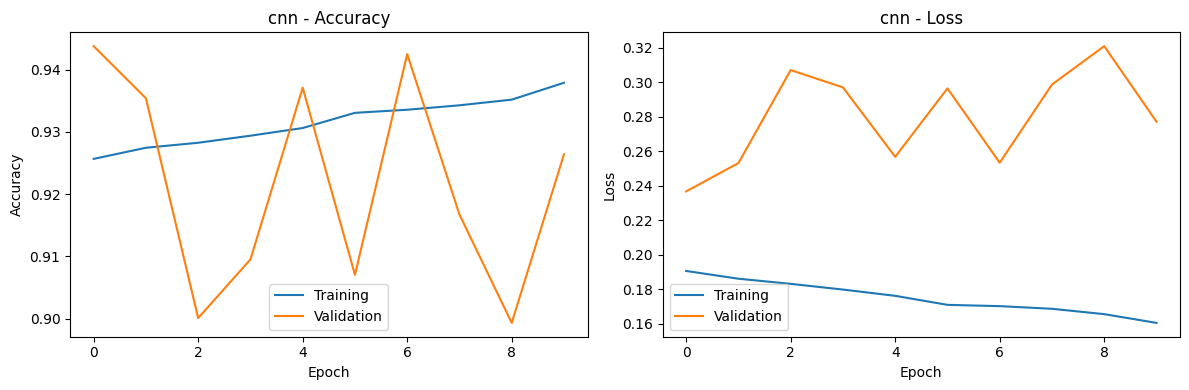

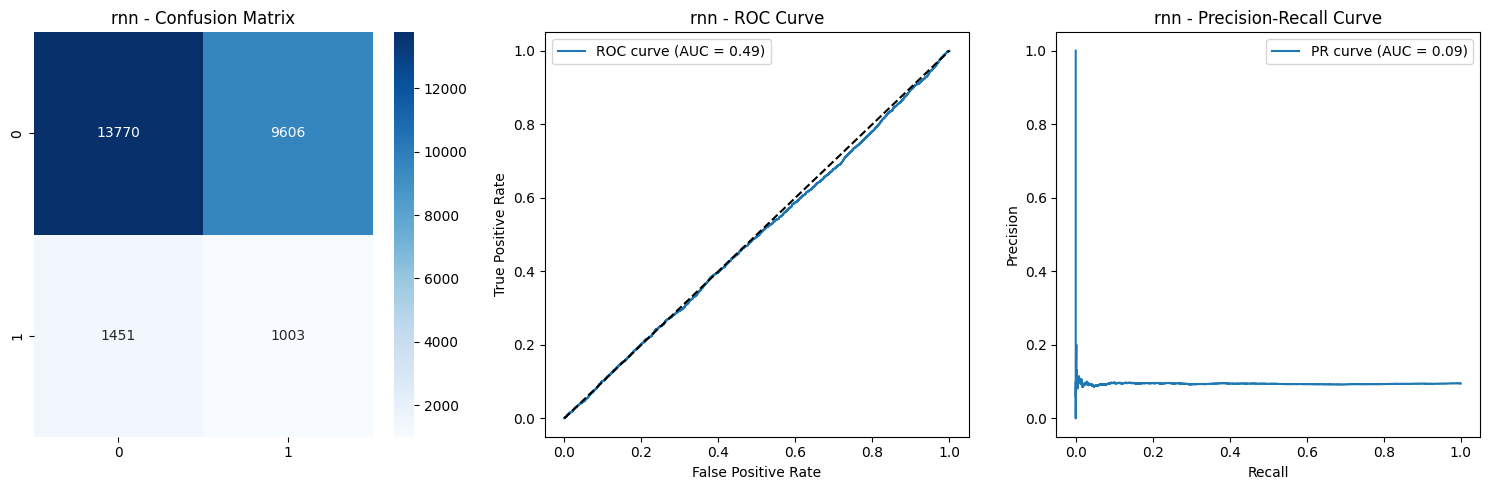

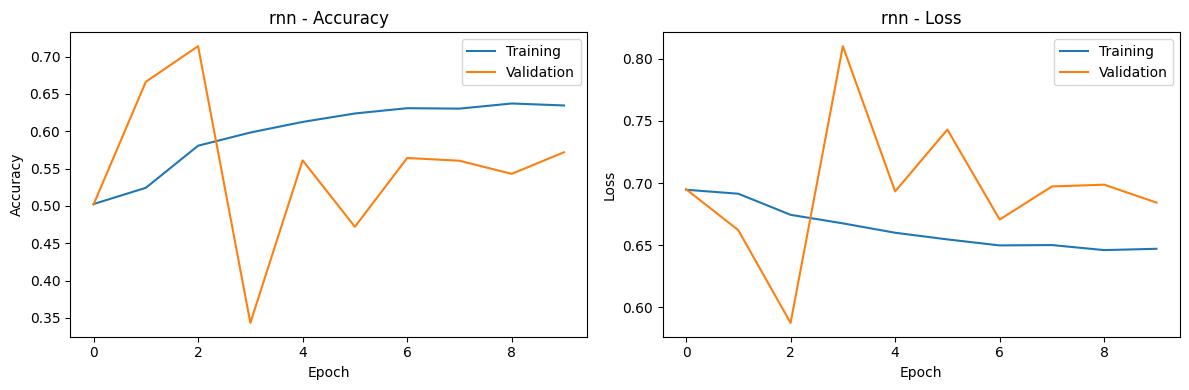

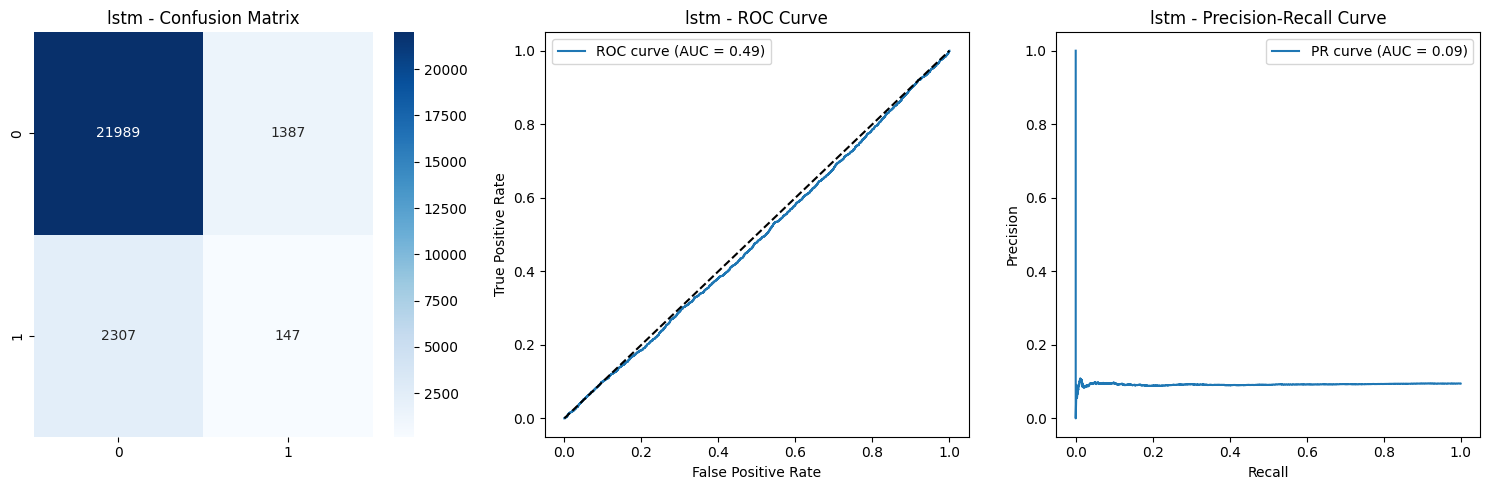

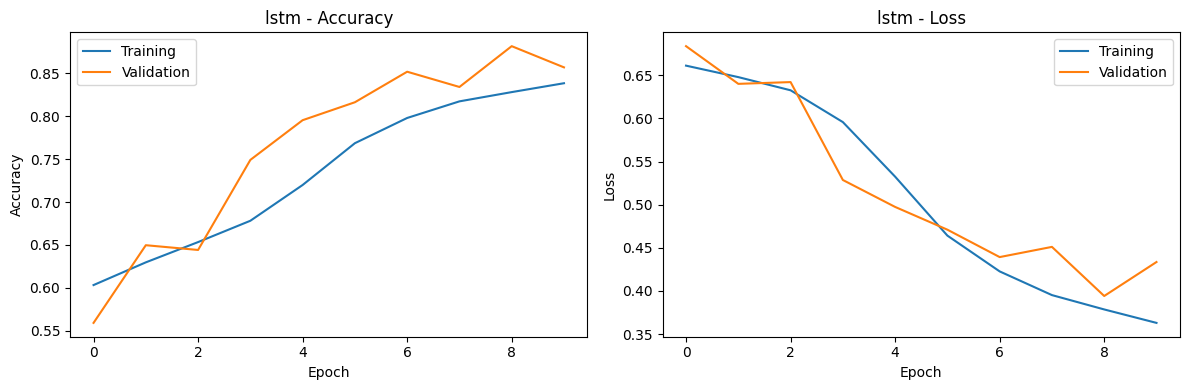

In [25]:
# Plot results for fraud_data models
print("\nE-commerce Fraud Detection Results:")
fraud_detector_ecommerce.plot_results()

### results for credit card fraud models 


Credit Card Fraud Detection Results:


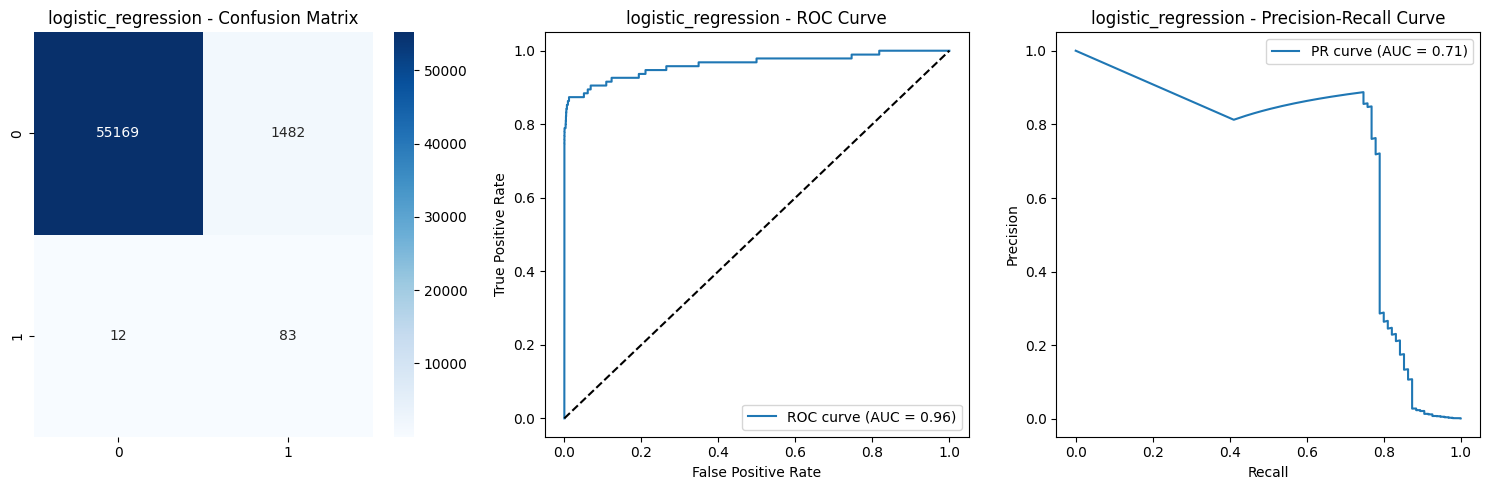

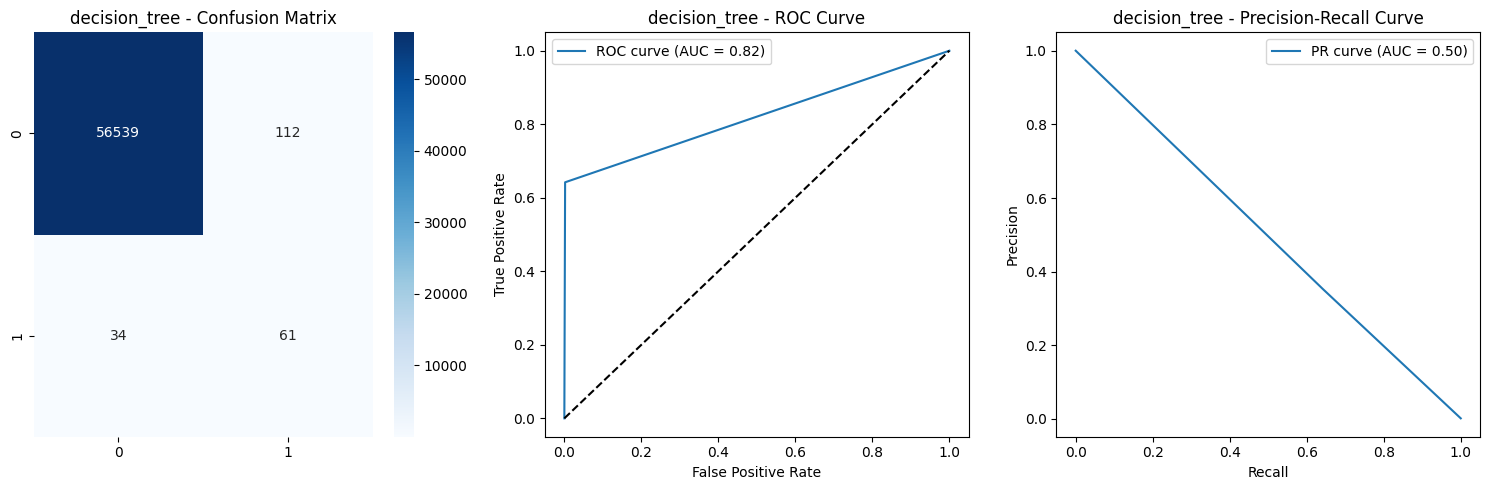

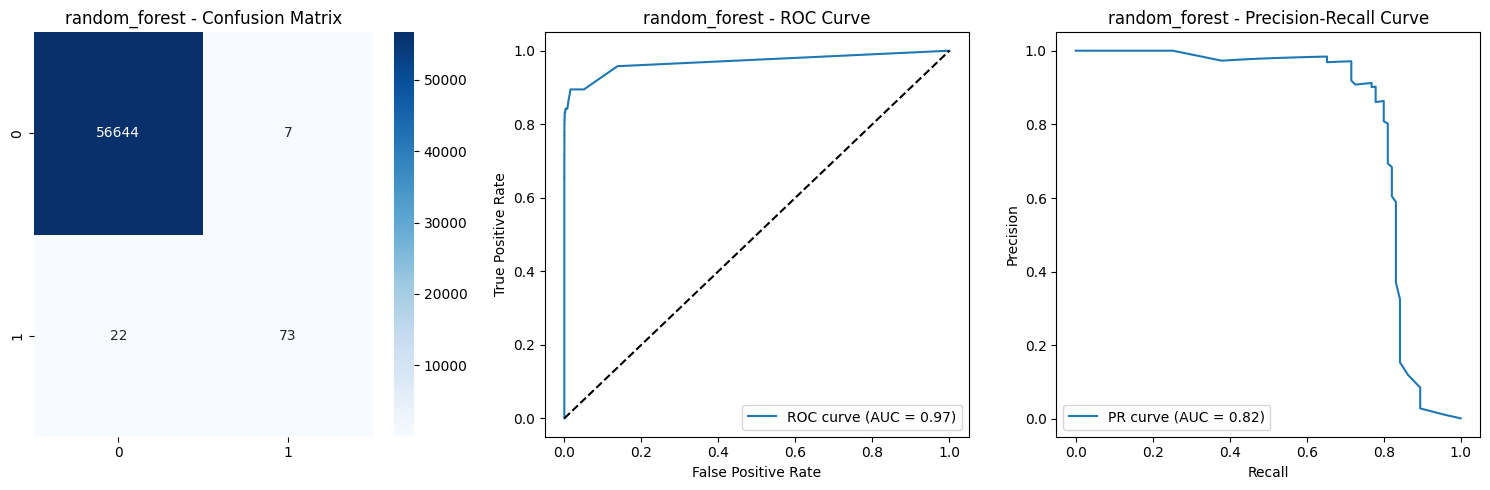

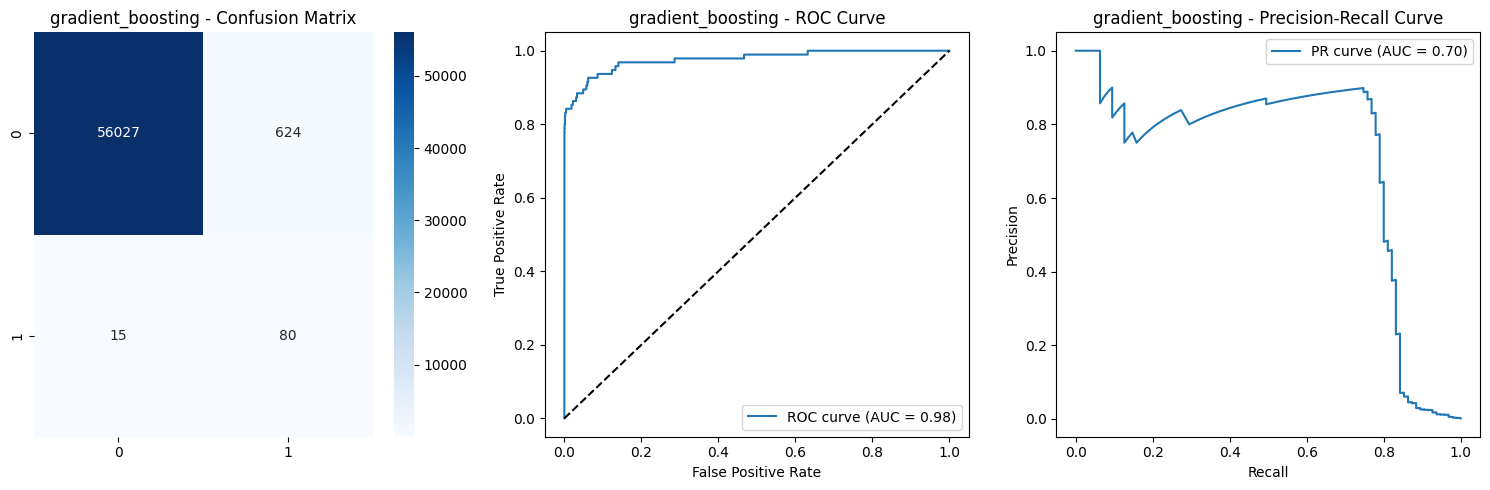

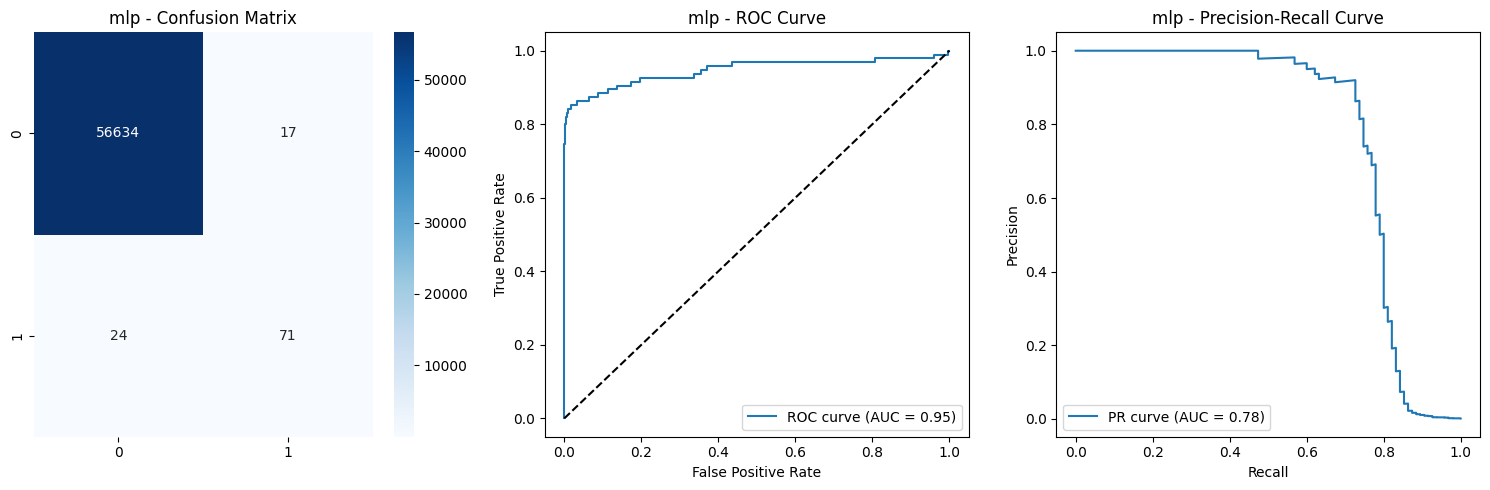

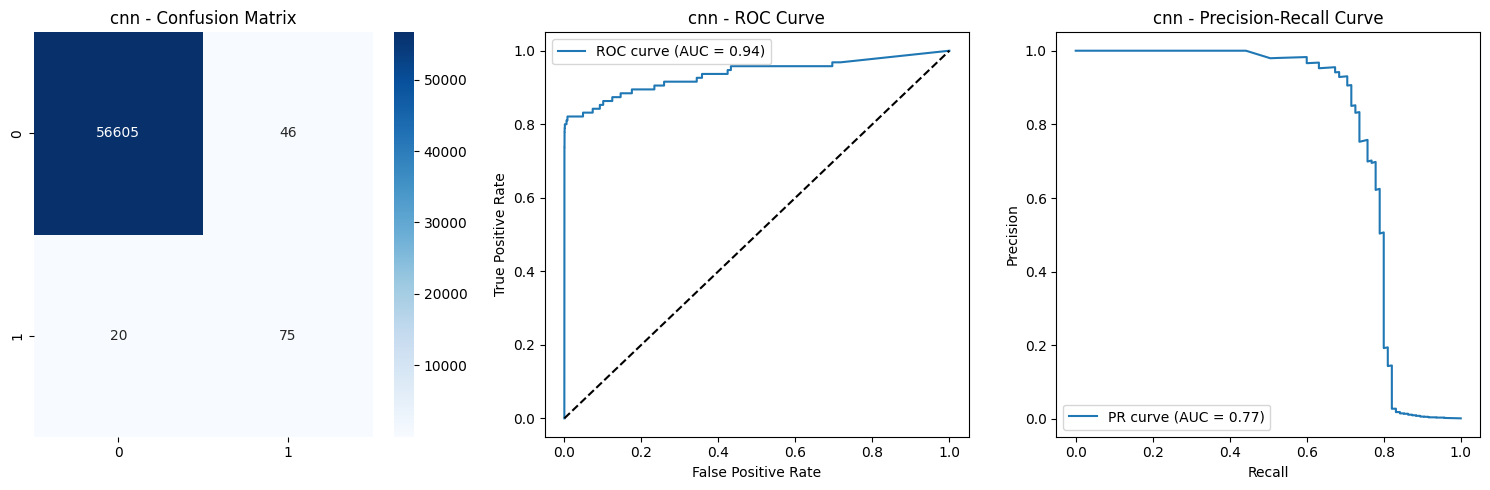

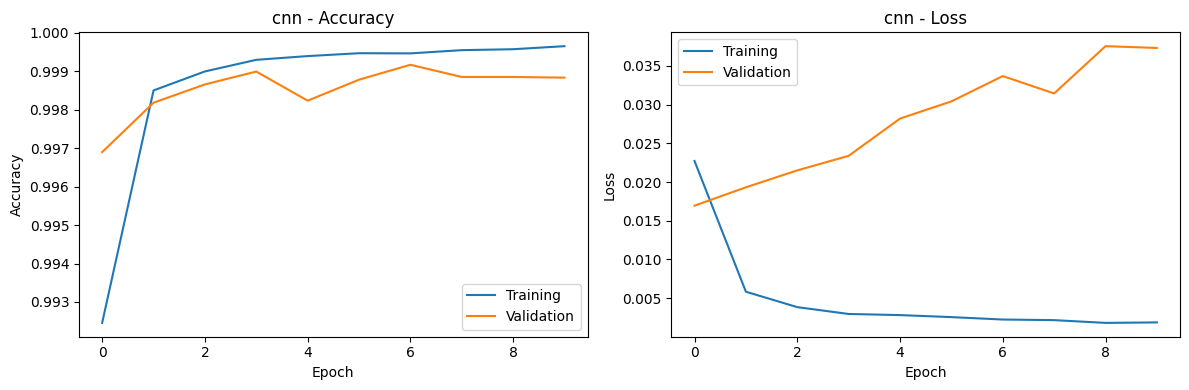

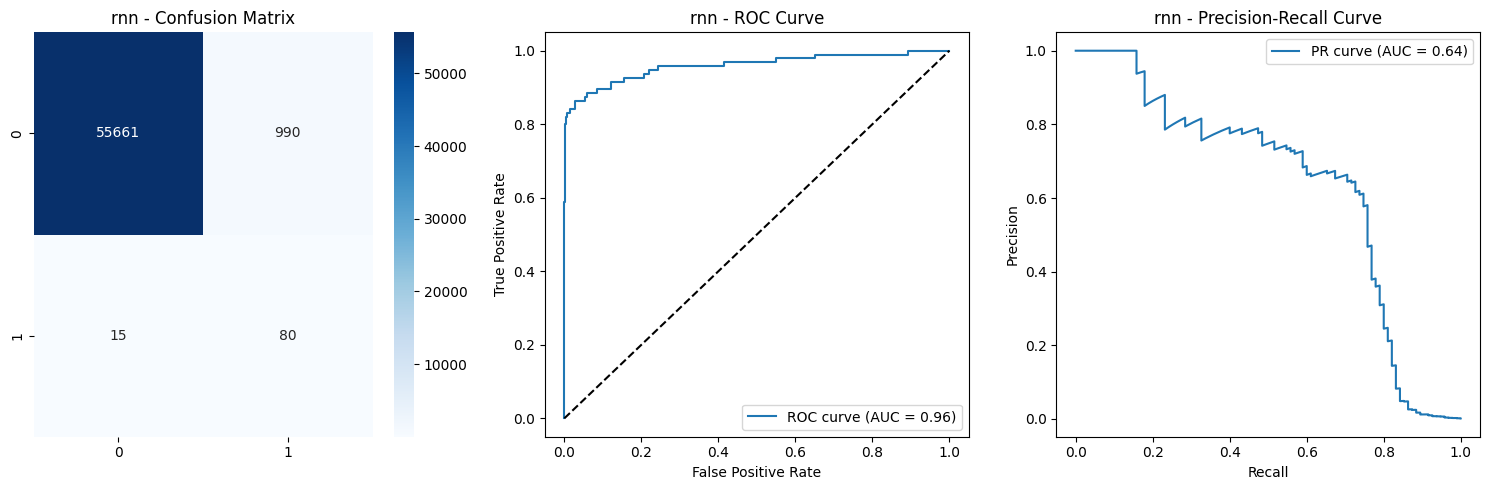

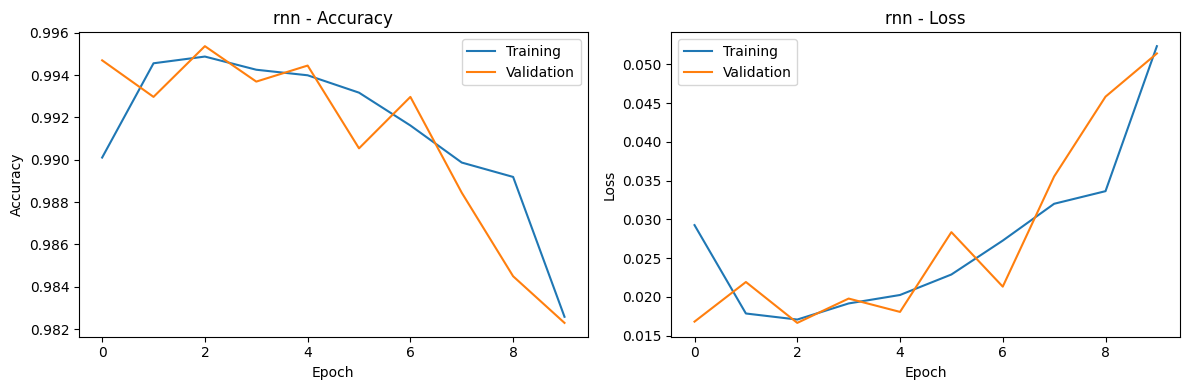

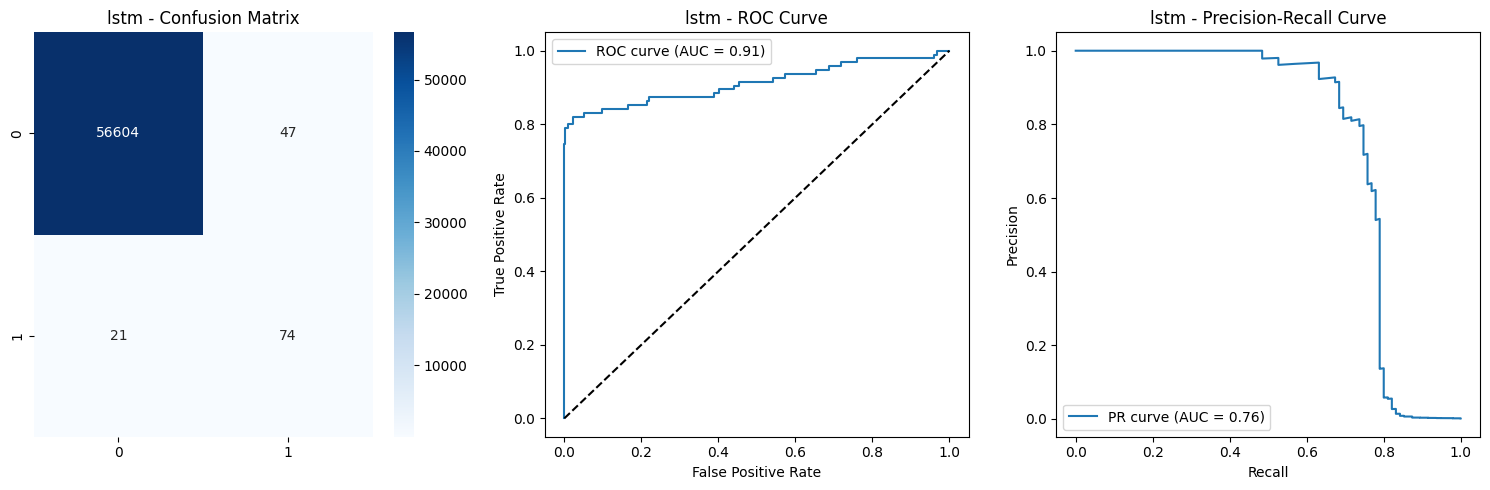

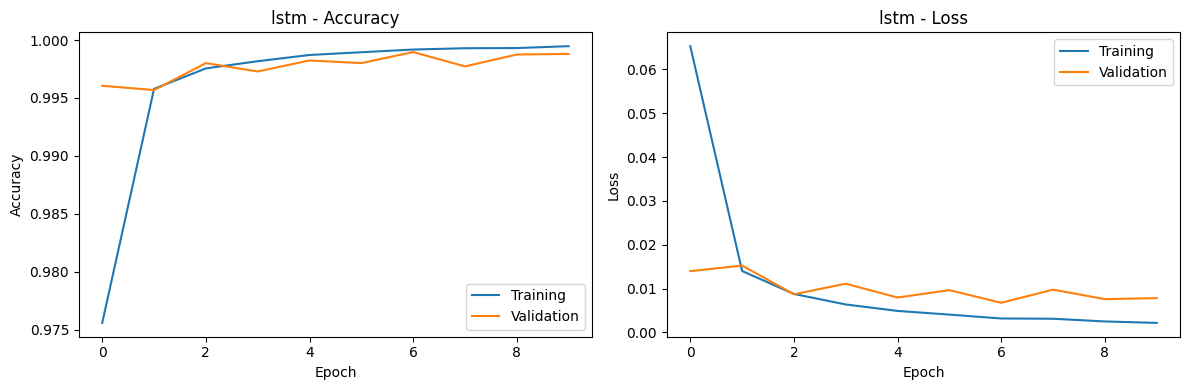

In [26]:
# Plot results for credit card fraud models
print("\nCredit Card Fraud Detection Results:")
fraud_detector_credit.plot_results()

## Compare model performances

In [27]:
# Compare model performances
def print_model_comparison(detector, dataset_name):
    print(f"\nModel Performance Comparison for {dataset_name}:")
    print("-" * 80)
    print(f"{'Model':<20} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'AUC-ROC':<10}")
    print("-" * 80)
    
    for model_name, results in detector.results.items():
        if 'classification_report' in results:
            metrics = results['classification_report']
            auc_roc = results['roc_curve'][2]
            print(f"{model_name:<20} "
                  f"{metrics['accuracy']:<10.3f} "
                  f"{metrics['weighted avg']['precision']:<10.3f} "
                  f"{metrics['weighted avg']['recall']:<10.3f} "
                  f"{metrics['weighted avg']['f1-score']:<10.3f} "
                  f"{auc_roc:<10.3f}")

print("\nComparing model performances...")
print_model_comparison(fraud_detector_ecommerce, "E-commerce Fraud Detection")
print_model_comparison(fraud_detector_credit, "Credit Card Fraud Detection")


Comparing model performances...

Model Performance Comparison for E-commerce Fraud Detection:
--------------------------------------------------------------------------------
Model                Accuracy   Precision  Recall     F1-Score   AUC-ROC   
--------------------------------------------------------------------------------
logistic_regression  0.733      0.884      0.733      0.785      0.771     
decision_tree        0.902      0.910      0.902      0.905      0.757     
random_forest        0.956      0.956      0.956      0.950      0.768     
gradient_boosting    0.956      0.957      0.956      0.950      0.773     
mlp                  0.891      0.904      0.891      0.897      0.759     
cnn                  0.926      0.923      0.926      0.925      0.773     
rnn                  0.572      0.828      0.572      0.660      0.493     
lstm                 0.857      0.828      0.857      0.842      0.487     

Model Performance Comparison for Credit Card Fraud Detecti

In [28]:
# Save best models
print("\nSaving best models...")

def get_best_model(detector):
    best_f1 = 0
    best_model_name = None
    
    for model_name, results in detector.results.items():
        if 'classification_report' in results:
            f1 = results['classification_report']['weighted avg']['f1-score']
            if f1 > best_f1:
                best_f1 = f1
                best_model_name = model_name
    
    return best_model_name, detector.models[best_model_name]


Saving best models...


In [29]:
# save best models
with mlflow.start_run(run_name="best_models"):
    # Save best e-commerce fraud model
    best_ecommerce_model_name, best_ecommerce_model = get_best_model(fraud_detector_ecommerce)
    mlflow.sklearn.log_model(best_ecommerce_model, "best_ecommerce_fraud_model")
    print(f"\nBest model for E-commerce Fraud Detection: {best_ecommerce_model_name}")
    
    # Save best credit card fraud model
    best_credit_model_name, best_credit_model = get_best_model(fraud_detector_credit)
    mlflow.sklearn.log_model(best_credit_model, "best_credit_fraud_model")
    print(f"Best model for Credit Card Fraud Detection: {best_credit_model_name}")

print("\nModel training and evaluation completed!")

2024/10/22 19:49:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Best model for E-commerce Fraud Detection: gradient_boosting


2024/10/22 19:50:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Best model for Credit Card Fraud Detection: random_forest

Model training and evaluation completed!


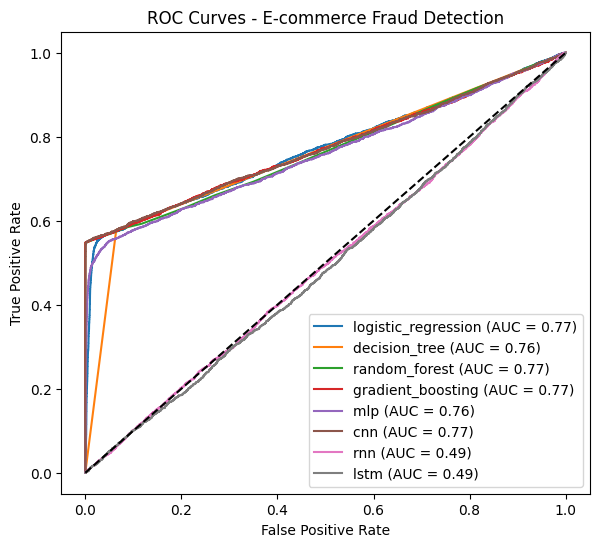

In [30]:
# Generate summary visualizations
plt.figure(figsize=(15, 6))

# ROC curves for all models (E-commerce)
plt.subplot(1, 2, 1)
for model_name, results in fraud_detector_ecommerce.results.items():
    if 'roc_curve' in results:
        fpr, tpr, auc_score = results['roc_curve']
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - E-commerce Fraud Detection')
plt.legend()

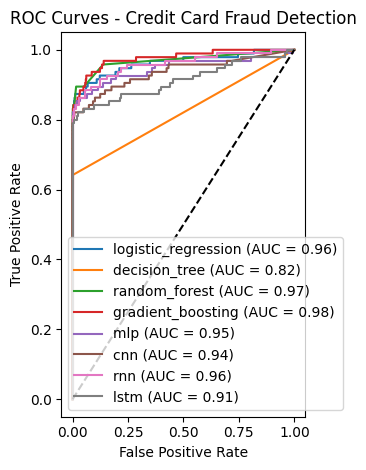

In [31]:
# ROC curves for all models (Credit Card)
plt.subplot(1, 2, 2)
for model_name, results in fraud_detector_credit.results.items():
    if 'roc_curve' in results:
        fpr, tpr, auc_score = results['roc_curve']
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Credit Card Fraud Detection')
plt.legend()

plt.tight_layout()
plt.show()

In [32]:
# Save the models and scalers for later use
import joblib

# Save the best models and their corresponding scalers
joblib.dump(best_ecommerce_model, 'best_ecommerce_fraud_model.joblib')
joblib.dump(best_credit_model, 'best_credit_fraud_model.joblib')
joblib.dump(fraud_detector_ecommerce.scaler, 'ecommerce_scaler.joblib')
joblib.dump(fraud_detector_credit.scaler, 'credit_scaler.joblib')

print("\nBest models and scalers have been saved to disk!")


Best models and scalers have been saved to disk!


In [47]:
import shap

def explain_model_shap(best_credit_model, X_train, X_test):
    explainer = shap.TreeExplainer(best_credit_model)  # For tree-based models
    shap_values = explainer.shap_values(X_test)
    return shap_values

def shap_summary_plot(best_credit_model, X_train, X_test, feature_names):
    shap_values = explain_model_shap(best_credit_model, X_train, X_test)
    shap.summary_plot(shap_values, X_test, feature_names=feature_names)

def shap_dependence_plot(best_credit_model, X_train, X_test, feature, feature_names):
    shap_values = explain_model_shap(best_credit_model, X_train, X_test)
    shap.dependence_plot(feature, shap_values, X_test, feature_names=feature_names)


In [ ]:
X_train_fraud_scaled, X_test_fraud_scaled, y_train_fraud, y_test_fraud = \
    fraud_detector_ecommerce.prepare_data(X_fraud, y_fraud, test_size=0.2, sampling_strategy='balanced')

In [ ]:
# Call after training the model
shap_summary_plot(best_credit_model, X_fraud, X_test_fraud_scaled, feature_names=fraud_data.columns)

# To visualize the impact of a specific feature
shap_dependence_plot(best_credit_model,X_fraud, X_test_fraud_scaled, 'purchase_value', feature_names=fraud_data.columns)
